<a href="https://colab.research.google.com/github/Ri05/TechWorks-ML-Model/blob/main/Project_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing ML Case Study File**

---



In [ ]:
import pandas as pd # Importing the pandas library, which is used for data manipulation and analysis
from google.colab import files # Import the files module from Google Colab, which allows uploading files to the Colab environment
uploaded = files.upload() # Upload files to the Google Colab environment

Saving ML case Study.csv to ML case Study.csv


In [ ]:
df1 = pd.read_csv('ML case Study.csv') # Reading the uploaded CSV file into a pandas DataFrame called df1
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


# **Importing Colleges File**

---



In [ ]:
from google.colab import files # Import the files module from Google Colab, which allows uploading files to the Colab environment
uploaded = files.upload()

Saving Colleges.csv to Colleges.csv


In [ ]:
df2 = pd.read_csv('Colleges.csv') # Reading the uploaded CSV file into a pandas DataFrame called df2
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


# **Importing Cities File**

---



In [ ]:
from google.colab import files
uploaded = files.upload() # Upload files to the Google Colab environment

Saving cities.csv to cities.csv


In [ ]:
df3= pd.read_csv('cities.csv') # Reading the uploaded CSV file into a pandas DataFrame called df3
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# **Data Preprocessing**

---



**Preparing Tiers Lists**

In [ ]:
Tier1 = df2["Tier 1"].tolist() # Converting the "Tier 1" column of df2 to a list and assigning it to the variable Tier1
Tier2 = df2["Tier 2"].tolist() # Converting the "Tier 2" column of df2 to a list and assigning it to the variable Tier2
Tier3 = df2["Tier 3"].tolist() # Converting the "Tier 3" column of df2 to a list and assigning it to the variable Tier3

**Replacing Colleges with Tiers**

In [ ]:
# Creating a new column 'College Type'
df1['College Type'] = df1['College']

# Replacing college names with tier numbers
for index, row in df1.iterrows():
    if row['College'] in Tier1:
        df1.at[index, 'College Type'] = 1
    elif row['College'] in Tier2:
        df1.at[index, 'College Type'] = 2
    elif row['College'] in Tier3:
        df1.at[index, 'College Type'] = 3

**Preparing City Categories**

In [ ]:
MetroCities = df3["Metrio City"].tolist()
NonMetroCities = df3["non-metro cities"].tolist()

**Replacing Cities with Categories**

In [ ]:
# Creating a new column 'City Category'
df1['City Category'] = df1['City']

# Replacing city names with category numbers
for index, row in df1.iterrows():
    if row['City'] in MetroCities:
        df1.at[index, 'City Category'] = 1
    elif row['City'] in NonMetroCities:
        df1.at[index, 'City Category'] = 0

**Output**

In [ ]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Category
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,2,0
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,2,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,3,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,3,0
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,1,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   College Type         1589 non-null   object 
 9   City Category        1589 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 124.3+ KB


In [ ]:
df1.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


# **Dummy Variable**

---



In [ ]:
df1 = pd.get_dummies(df1, columns=['Role']) # Creating dummy variables for the 'Role' column and adding them to the DataFrame

In [ ]:
df1.head() # Displaying the first few rows of the DataFrame with dummy variables

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Category,Role_Executive,Role_Manager
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,2,0,False,True
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,2,0,True,False
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,3,0,True,False
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,3,0,True,False
4,DTU,Durgapur,57879.0,4,74,32,73878.10,1,0,True,False


**Changing the data type**

In [ ]:
df1['Role_Executive'] = df1['Role_Executive'].astype(int)
df1['Role_Manager'] = df1['Role_Manager'].astype(int)

In [ ]:
df1['College Type'] = df1['College Type'].astype(int)
df1['City Category'] = df1['City Category'].astype(int)

In [ ]:
df1.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Category,Role_Executive,Role_Manager
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,2,0,0,1
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,2,0,1,0
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,3,0,1,0
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,3,0,1,0
4,DTU,Durgapur,57879.0,4,74,32,73878.10,1,0,1,0


**Dropping Some Columns**

In [ ]:
# Dropping the original 'College' and 'City' columns
df1 = df1.drop(columns=['College', 'City'])

In [ ]:
df1.head() # Displaying the first few rows of the DataFrame after dropping the columns

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Category,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,2,0,0,1
1,57081.0,1,84,18,68005.87,2,0,1,0
2,60347.0,2,52,28,76764.02,3,0,1,0
3,49010.0,2,81,33,82092.39,3,0,1,0
4,57879.0,4,74,32,73878.10,1,0,1,0


In [ ]:
df1.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Category,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,1.975456,0.514160,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330,0.499957,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000,1.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,3.000000,1.000000,1.000000,1.000000


# **Data Visualization**

---



In [ ]:
import seaborn as sns #importing seaborn library for data visualization

In [ ]:
df1.shape

(1589, 9)

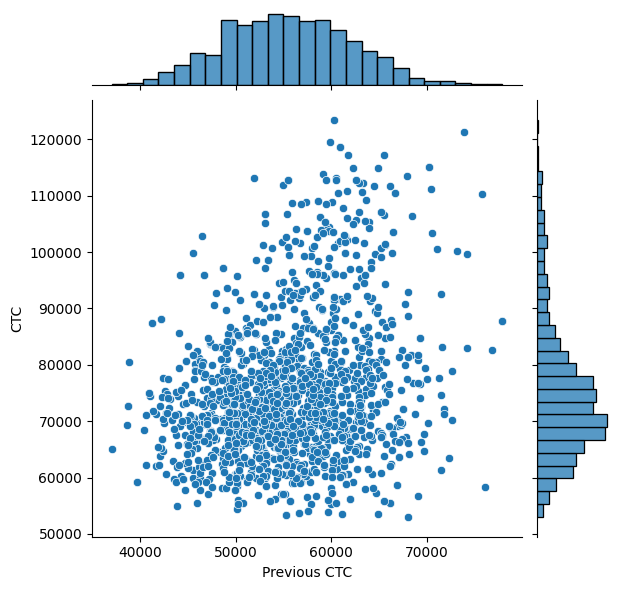

In [ ]:
sns.jointplot(x='Previous CTC',y='CTC',data=df1) #plotting a joint plot of 'Previous CTC' and 'CTC'

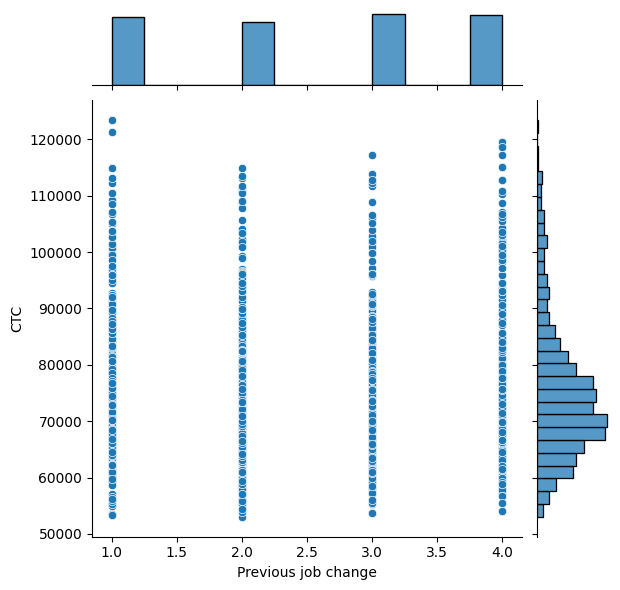

In [ ]:
sns.jointplot(x='Previous job change',y='CTC',data=df1) #plotting a joint plot of 'Previous job change' and 'CTC'

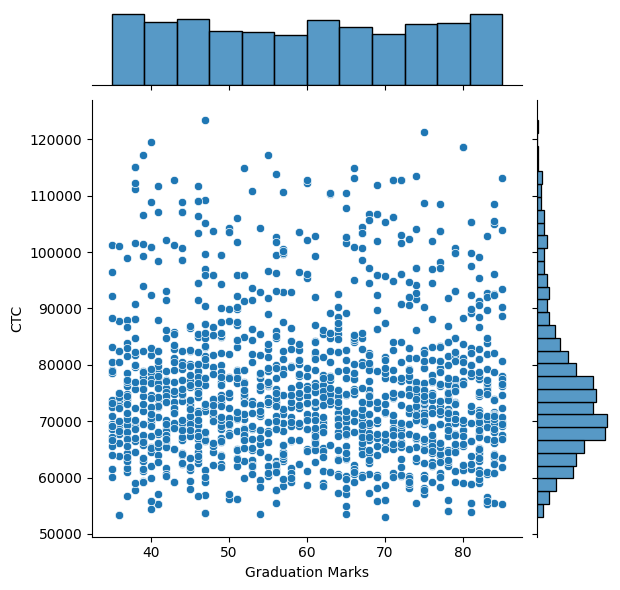

In [ ]:
sns.jointplot(x='Graduation Marks',y='CTC',data=df1) #plotting a joint plot of 'Graduation Marks' and 'CTC'

In [ ]:
import numpy as np #importing numpy library for mathematical operations

# **Skewness treatment for feature transformation**

---



In [ ]:
df1['Previous CTC'] = np.log(1+df1['Previous CTC']) #applying log transformation to 'Previous CTC'

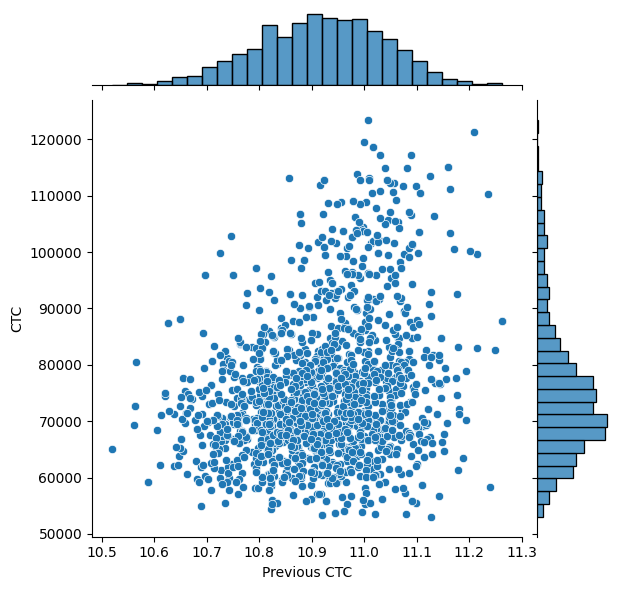

In [ ]:
sns.jointplot(x='Previous CTC',y='CTC',data=df1) #plotting a joint plot of 'Previous CTC' and 'CTC' after log transformation

# **Building a Linear Regression Modal**

---



In [ ]:
import statsmodels.api as sn #importing statsmodels.api as sn for statistical modeling and analysis

In [ ]:
x = sn.add_constant(df1['Previous CTC']) #adding a constant term to the input features 'Previous CTC'

In [ ]:
lm = sn.OLS(df1['CTC'],x).fit() #fitting a linear regression model with 'CTC' as the dependent variable and 'Previous CTC' as the independent variable

In [ ]:
lm.summary() #displaying the summary of the linear regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     110.7
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.49e-25
Time:                        13:13:16   Log-Likelihood:                -17201.
No. Observations:                1589   AIC:                         3.441e+04
Df Residuals:                    1587   BIC:                         3.442e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.152e+05   2.76e+04     -7.793      0.000   -2.69e+05   -1.61e+05
Previous CTC  2.662e+04   2529.745     10.522      0.000    2.17e+04    3.16e+04
==============================================================================
Omnibus:                      174.670   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.972
Skew:                           0.869   Prob(JB):                     3.48e-52
Kurtosis:                       3.749   Cond. No.                         996.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression #importing LinearRegression from sklearn.linear_model for linear regression

In [ ]:
y = df1['CTC']

In [ ]:
X =df1[['Previous CTC']]

In [ ]:
lm2  = LinearRegression()

In [ ]:
lm2.fit(x,y) #fitting the model

LinearRegression()

In [ ]:
print (lm2.intercept_,lm2.coef_)

-215234.62535713555 [    0.         26617.31165396]


In [ ]:
lm2.predict(x)

array([75548.07601869, 76284.66941617, 77765.6293922 , ...,
       69899.89826669, 73830.87325875, 69569.49607989])

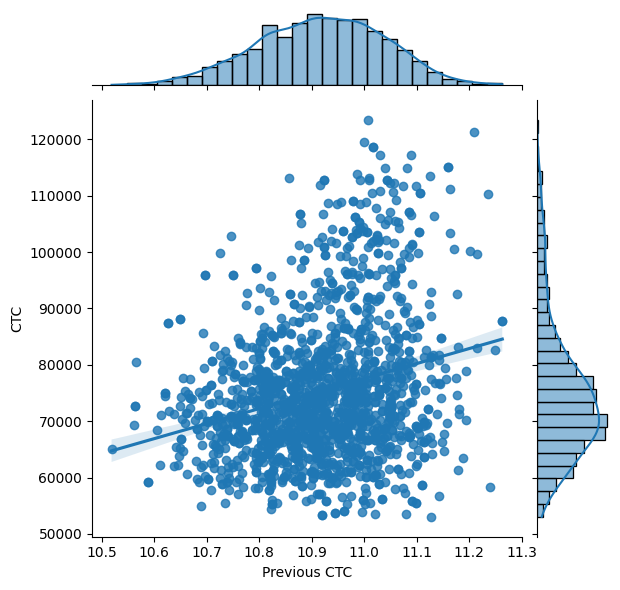

In [ ]:
sns.jointplot(x= df1['Previous CTC'], y= df1['CTC'], data =df1, kind ="reg")

# **Multiple Regression**

---



In [ ]:
X_multi = df1.drop("CTC",axis=1)

In [ ]:
X_multi.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College Type,City Category,Role_Executive,Role_Manager
0,10.924571,3,66,19,2,0,0,1
1,10.952244,1,84,18,2,0,1,0
2,11.007883,2,52,28,3,0,1,0
3,10.799800,2,81,33,3,0,1,0
4,10.966127,4,74,32,1,0,1,0


In [ ]:
y_multi = df1['CTC']

In [ ]:
y_multi.head()

,CTC
0,71406.58
1,68005.87
2,76764.02
3,82092.39
4,73878.10


In [ ]:
X_multi_cons = sn.add_constant(X_multi)

In [ ]:
X_multi_cons.head()

,const,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College Type,City Category,Role_Executive,Role_Manager
0,1.0,10.924571,3,66,19,2,0,0,1
1,1.0,10.952244,1,84,18,2,0,1,0
2,1.0,11.007883,2,52,28,3,0,1,0
3,1.0,10.799800,2,81,33,3,0,1,0
4,1.0,10.966127,4,74,32,1,0,1,0


In [ ]:
print(X_multi_cons.dtypes)

const                  float64
Previous CTC           float64
Previous job change      int64
Graduation Marks         int64
EXP (Month)              int64
College Type             int64
City Category            int64
Role_Executive           int64
Role_Manager             int64
dtype: object


In [ ]:
import pandas as pd #importing pandas as pd for data manipulation and analysis
import statsmodels.api as sn #importing statsmodels.api as sn for statistical modeling and analysis
lm_multi = sn.OLS(y_multi,X_multi_cons).fit()

In [ ]:
lm_multi.summary() #displaying the summary of multiple linear regression model result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     258.4
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.53e-256
Time:                        13:14:19   Log-Likelihood:                -16649.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.336e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.16e+05   1.31e+04     -8.836      0.000   -1.42e+05   -9.02e+04
Previous CTC         2.244e+04   1806.167     12.422      0.000    1.89e+04     2.6e+04
Previous job change   127.6083    193.031      0.661      0.509    -251.015     506.231
Graduation Marks        5.4384     14.511      0.375      0.708     -23.024      33.901
EXP (Month)           260.8678     15.478     16.854      0.000     230.508     291.227
College Type         -486.8658    258.596     -1.883      0.060    -994.094      20.362
City Category         385.5062    433.776      0.889      0.374    -465.331    1236.344
Role_Executive      -6.773e+04   6561.871    -10.322      0.000   -8.06e+04   -5.49e+04
Role_Manager        -4.823e+04   6572.877     -7.337      0.000   -6.11e+04   -3.53e+04
==============================================================================
Omnibus:                       50.428   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.057
Skew:                           0.412   Prob(JB):                     6.72e-13
Kurtosis:                       3.408   Cond. No.                     3.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.31e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Making another modal as lm3**

In [ ]:
lm3= LinearRegression()

In [ ]:
lm3.fit(X_multi,y_multi) #fitting multiple linear regression model

LinearRegression()

In [ ]:
print(lm3.intercept_,lm3.coef_)

-173940.26091002813 [ 2.24370373e+04  1.27608267e+02  5.43835426e+00  2.60867817e+02
 -4.86865817e+02  3.85506234e+02 -9.75433897e+03  9.75433897e+03]


# **HOW TO TEST AND TRAIN OUR MODAL SELECTION**

---



In [ ]:
from sklearn.model_selection import train_test_split # Importing train_test_split function from sklearn.model_selection for splitting data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi,test_size = 0.2, random_state=0) # Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [ ]:
lm_a = LinearRegression()

In [ ]:
lm_a.fit(X_train,y_train) # Fitting the linear model lma to the training data (x_train and y_train)

LinearRegression()

In [ ]:
y_test_a = lm_a.predict(X_test)

In [ ]:
y_train_a = lm_a.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score # Importing r2_score function from sklearn.metrics to evaluate the performance of regression models

In [ ]:
r2_score(y_test,y_test_a)

0.5387007078732649

In [ ]:
r2_score(y_train, y_train_a)

0.5316258094912341

# **Ridge Regression**

---



In [ ]:
from sklearn import preprocessing # Importing preprocessing module from sklearn for data preprocessing

In [ ]:
scaler = preprocessing.StandardScaler() .fit(X_train) # Creating a StandardScaler object and fitting it to the training data

In [ ]:
X_train_s = scaler.transform(X_train)

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge # Importing Ridge function from sklearn.linear_model for Ridge regression

In [ ]:
lm_r = Ridge(alpha=0.5)
lm_r.fit(X_train_s,y_train) # Fitting the Ridge regression model lm_r to the scaled training data (X_train_s and y_train)

Ridge(alpha=0.5)

In [ ]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5386950261808985

In [ ]:
from sklearn.model_selection import validation_curve # Importing validation_curve function from sklearn.model_selection for model validation

In [ ]:
param_range = np.logspace(-2,8,100) # Defining a range of values from -2 to 8 (logarithmic scale) with 100 points for hyperparameter tuning

In [ ]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [ ]:
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring="r2")

In [ ]:
print(train_scores)
print(test_scores)

[[5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902473e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121962e-01]
 [5.24902473e-01 5.31500542e-01 5.38505504e-01 5.36446003e-01
  5.29121962e-01]
 [5.24902473e-01 5.31500541e-01 5.38505503e-01 5.36446003e-01
  5.29121962e-01]
 [5.24902472e-01 5.31500540e-01 5.38505502e-01 5.36446002e-01
  5.29121961e-01]
 [5.24902471e-01 5.31500539e-01 5.38505501e-01 5.36446001e-01
  5.29121959e-01]
 [5.24902468e-01 5.31500537e-01 5.385054

In [ ]:
train_mean = np.mean(train_scores, axis =1) # Calculating the mean of training scores for each value of the hyperparameter

In [ ]:
test_mean = np.mean(test_scores, axis =1) # Calculating the mean of testing scores for each value of the hyperparameter

In [ ]:
train_mean

array([5.32095298e-01, 5.32095298e-01, 5.32095298e-01, 5.32095298e-01,
       5.32095298e-01, 5.32095297e-01, 5.32095297e-01, 5.32095297e-01,
       5.32095297e-01, 5.32095296e-01, 5.32095295e-01, 5.32095294e-01,
       5.32095292e-01, 5.32095289e-01, 5.32095284e-01, 5.32095275e-01,
       5.32095262e-01, 5.32095241e-01, 5.32095207e-01, 5.32095154e-01,
       5.32095069e-01, 5.32094934e-01, 5.32094719e-01, 5.32094376e-01,
       5.32093832e-01, 5.32092966e-01, 5.32091589e-01, 5.32089402e-01,
       5.32085929e-01, 5.32080418e-01, 5.32071679e-01, 5.32057839e-01,
       5.32035950e-01, 5.32001390e-01, 5.31946941e-01, 5.31861394e-01,
       5.31727438e-01, 5.31518559e-01, 5.31194544e-01, 5.30695142e-01,
       5.29931449e-01, 5.28774727e-01, 5.27042866e-01, 5.24485560e-01,
       5.20770797e-01, 5.15477181e-01, 5.08098631e-01, 4.98069051e-01,
       4.84813215e-01, 4.67825099e-01, 4.46765990e-01, 4.21564020e-01,
       3.92488649e-01, 3.60173443e-01, 3.25571266e-01, 2.89845677e-01,
      

In [ ]:
max(test_mean)

0.5242250903412725

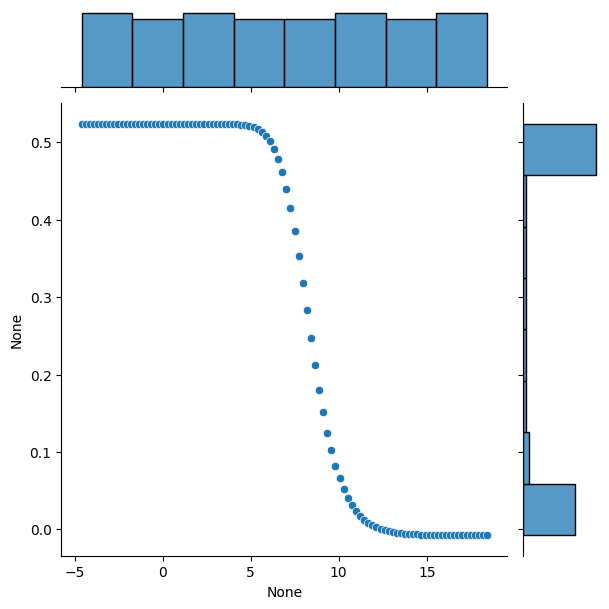

In [ ]:
sns.jointplot(x=np.log(param_range), y=test_mean) # Plotting the mean testing scores against the log of the hyperparameter values

In [ ]:
np.where(test_mean==max(test_mean))

(array([30]),)

In [ ]:
param_range[30]

10.722672220103231

In [ ]:
lm_r_best = Ridge(alpha = param_range[30]) # Creating a Ridge regression model with the best hyperparameter value
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [ ]:
r2_score(y_test, lm_r_best.predict(X_test_s)) # Evaluating the performance of the model on the test data

0.5385662519742922

In [ ]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.5316107178708734

# **Lasso Regression**

---



In [ ]:
from sklearn.linear_model import Lasso # Importing Lasso function from sklearn.linear_model for Lasso regression

In [ ]:
lm_1 = Lasso(alpha=0.5) # Creating a Lasso regression model with the specified hyperparameter value
lm_1.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [ ]:
r2_score(y_test, lm_1.predict(X_test_s)) # Evaluating the performance of the model on the test data

0.5387060291431258

In [ ]:
from sklearn.model_selection import validation_curve # Importing validation_curve function from sklearn.model_selection for model validation

In [ ]:
param_range = np.logspace(-2,8,100) # Defining a range of values from -2 to 8 (logarithmic scale) with 100 points for hyperparameter tuning

In [ ]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [ ]:
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring="r2")

In [ ]:
param_range = np.logspace(-2,8,100) # Defining a range of values from -2 to 8 (logarithmic scale) with 100 points for hyperparameter tuning

In [ ]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [ ]:
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring="r2")

In [ ]:
print(train_scores)
print(test_scores)

[[5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902474e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121963e-01]
 [5.24902473e-01 5.31500542e-01 5.38505504e-01 5.36446004e-01
  5.29121962e-01]
 [5.24902473e-01 5.31500542e-01 5.38505504e-01 5.36446003e-01
  5.29121962e-01]
 [5.24902473e-01 5.31500541e-01 5.38505503e-01 5.36446003e-01
  5.29121962e-01]
 [5.24902472e-01 5.31500540e-01 5.38505502e-01 5.36446002e-01
  5.29121961e-01]
 [5.24902471e-01 5.31500539e-01 5.38505501e-01 5.36446001e-01
  5.29121959e-01]
 [5.24902468e-01 5.31500537e-01 5.385054

In [ ]:
train_mean = np.mean(train_scores, axis =1) # Calculating the mean of training scores for each value of the hyperparameter

In [ ]:
test_mean = np.mean(test_scores, axis =1) # Calculating the mean of testing scores for each value of the hyperparameter

In [ ]:
train_mean

array([5.32095298e-01, 5.32095298e-01, 5.32095298e-01, 5.32095298e-01,
       5.32095298e-01, 5.32095297e-01, 5.32095297e-01, 5.32095297e-01,
       5.32095297e-01, 5.32095296e-01, 5.32095295e-01, 5.32095294e-01,
       5.32095292e-01, 5.32095289e-01, 5.32095284e-01, 5.32095275e-01,
       5.32095262e-01, 5.32095241e-01, 5.32095207e-01, 5.32095154e-01,
       5.32095069e-01, 5.32094934e-01, 5.32094719e-01, 5.32094376e-01,
       5.32093832e-01, 5.32092966e-01, 5.32091589e-01, 5.32089402e-01,
       5.32085929e-01, 5.32080418e-01, 5.32071679e-01, 5.32057839e-01,
       5.32035950e-01, 5.32001390e-01, 5.31946941e-01, 5.31861394e-01,
       5.31727438e-01, 5.31518559e-01, 5.31194544e-01, 5.30695142e-01,
       5.29931449e-01, 5.28774727e-01, 5.27042866e-01, 5.24485560e-01,
       5.20770797e-01, 5.15477181e-01, 5.08098631e-01, 4.98069051e-01,
       4.84813215e-01, 4.67825099e-01, 4.46765990e-01, 4.21564020e-01,
       3.92488649e-01, 3.60173443e-01, 3.25571266e-01, 2.89845677e-01,
      

In [ ]:
max(test_mean) # Finding the maximum mean testing score

0.5242250903412725

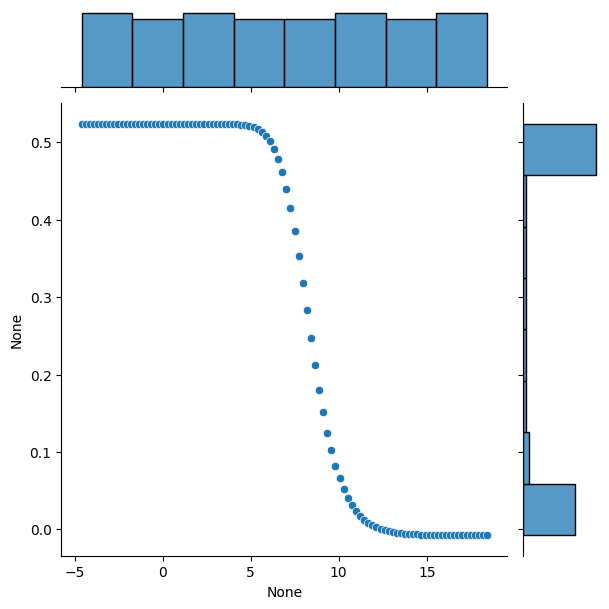

In [ ]:
sns.jointplot(x=np.log(param_range), y=test_mean) # Plotting the mean testing scores against the log of the hyperparameter values

In [ ]:
np.where(test_mean==max(test_mean)) # Finding the index of the hyperparameter value that corresponds to the maximum mean testing score

(array([30]),)

In [ ]:
param_range[30]

10.722672220103231

In [ ]:
lm_r_best = Lasso(alpha = param_range[30]) # Creating a Lasso regression model with the best hyperparameter value
lm_r_best.fit(X_train_s,y_train) # Creating a Lasso regression model with the best hyperparameter value

Lasso(alpha=10.722672220103231)

In [ ]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.5388106308613105

In [ ]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.5316209868348143

# **DECISION TREE FOR REGRESSION**

---



In [ ]:
from sklearn.tree import DecisionTreeRegressor # Importing DecisionTreeRegressor from sklearn.tree for decision tree regression
regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X_train,y_train) # Fitting the decision tree regression model regtree to the training data (X_train and y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_train_pred = regtree.predict(X_train) # Making predictions on the training data using the trained decision tree model
y_test_pred = regtree.predict(X_test) # Making predictions on the test data using the trained decision tree model

In [ ]:
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

**Modal Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score # Importing mean_squared_error and r2_score functions from sklearn.metrics to evaluate regression model performance

In [ ]:
mean_squared_error(y_test,y_test_pred) # Calculating the mean squared error between the actual test values and the predicted values

60424631.02613475

In [ ]:
r2_score(y_train,y_train_pred)

0.6137194061789908

In [ ]:
r2_score(y_test,y_test_pred)

0.5927831611924911

**Plotting decision tree**

In [ ]:
# Importing the tree module from sklearn
from sklearn import tree

# Assuming regtree is a decision tree model that has been fitted
dot_data = tree.export_graphviz(regtree, out_file=None)

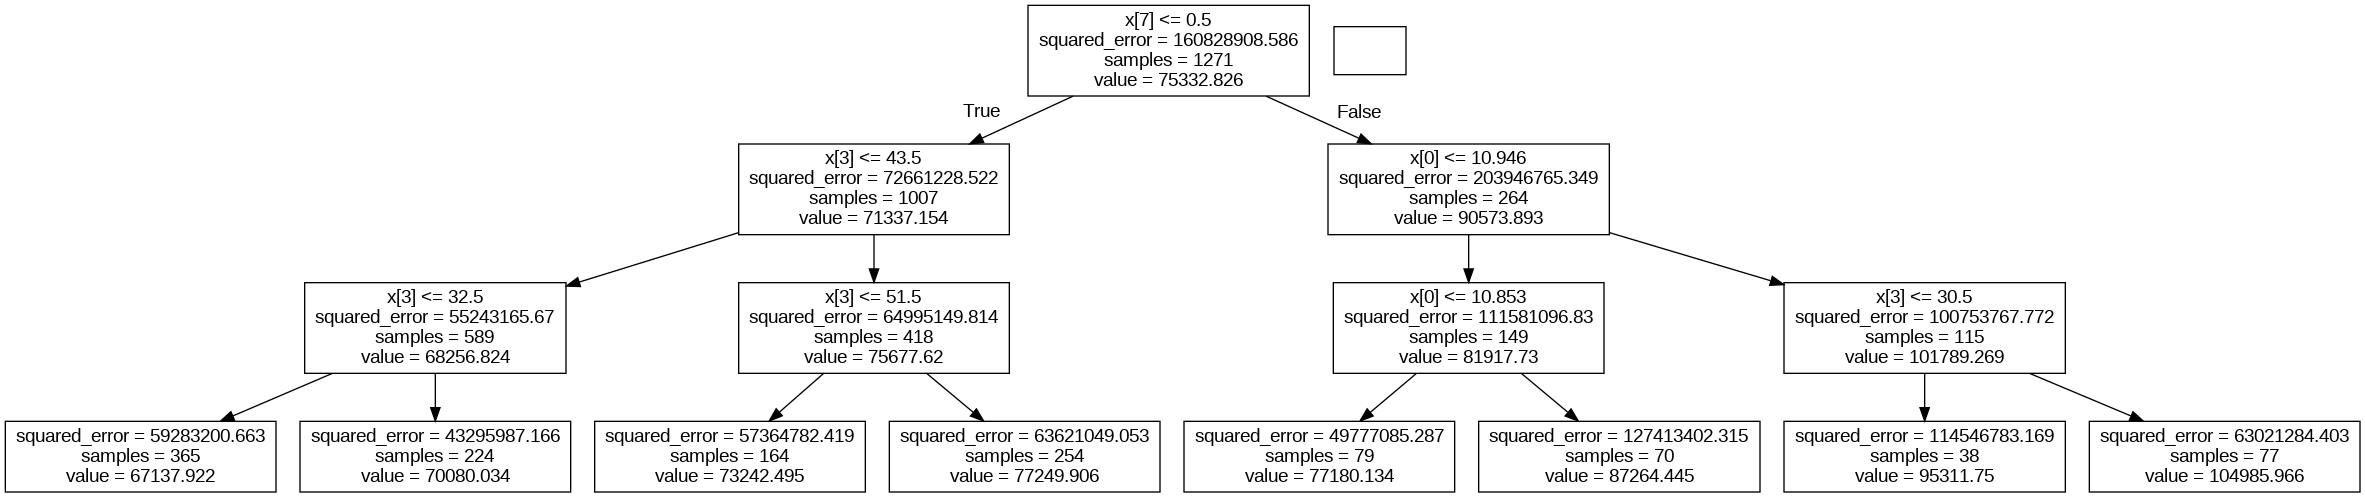

In [ ]:
from IPython.display import Image # Importing the Image class from IPython.display to display images
import pydotplus # Importing pydotplus for creating a graph from the decision tree
graph = pydotplus.graph_from_dot_data(dot_data) # Creating a graph from the dot data generated by the decision tree model
Image(graph.create_png())

# **CONTROLLING TREE GROWTH**

---


**PRE PRUNING**
Maximum number of levels in tree



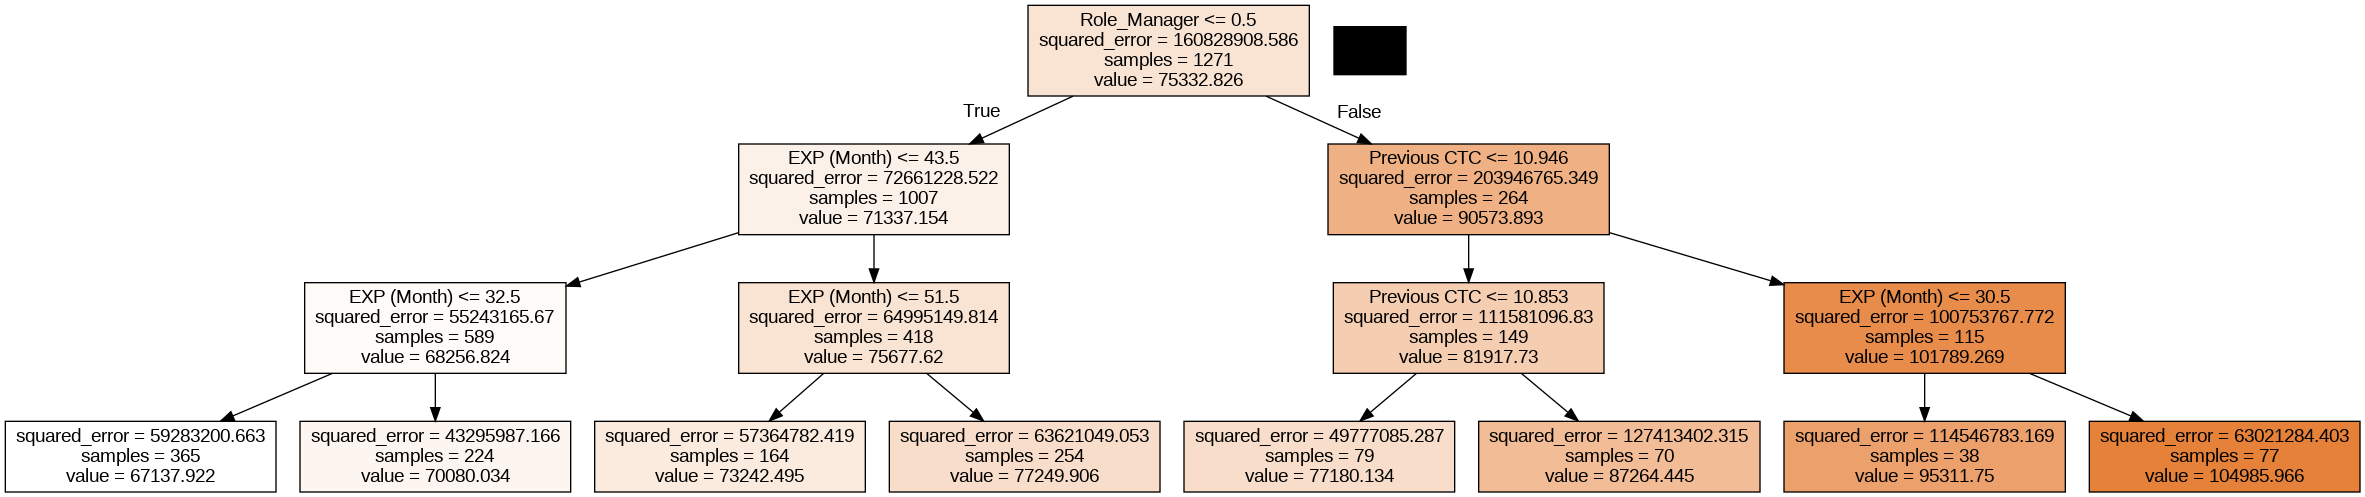

In [ ]:
regtree1 = tree.DecisionTreeRegressor(max_depth=3) # Creating a Decision Tree Regressor with a maximum depth of 3
regtree1.fit(X_train,y_train) # Fitting the decision tree regressor to the training data
dot_data = tree.export_graphviz(regtree1, out_file=None, feature_names= X_train.columns, filled = True) # Exporting the decision tree as a Graphviz dot file
graph1 = pydotplus.graph_from_dot_data(dot_data) # Creating an image from the graph and display it
Image(graph1.create_png())

**Minimum obseveration at internal node**

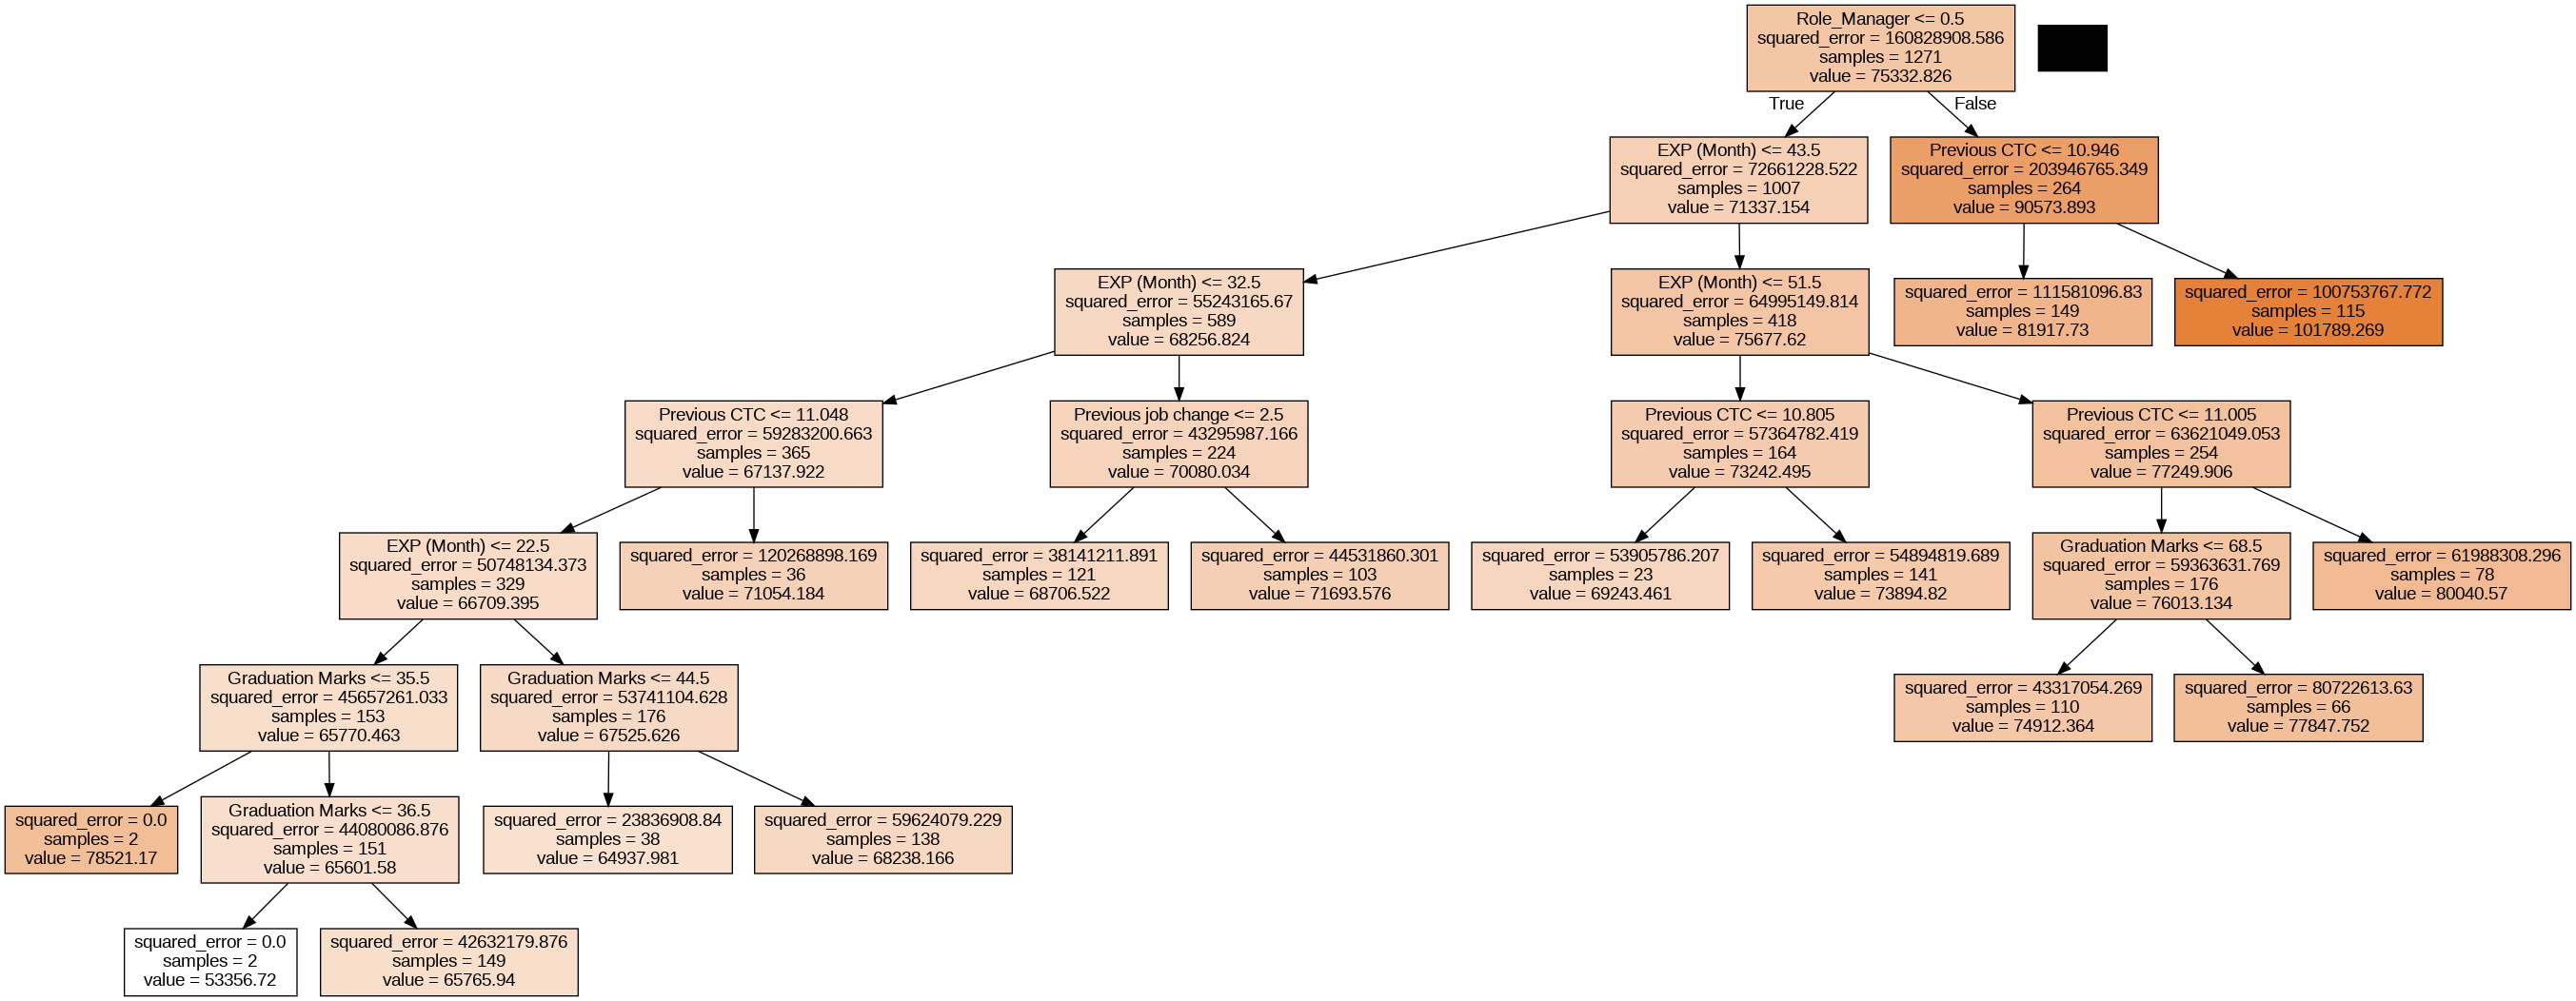

In [ ]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split=150) # Create a Decision Tree Regressor with a minimum number of samples required to split an internal node
regtree2.fit(X_train,y_train) # Fit the decision tree regressor to the training data
dot_data = tree.export_graphviz(regtree2, out_file=None, feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

**Minimum observation at leaf node**

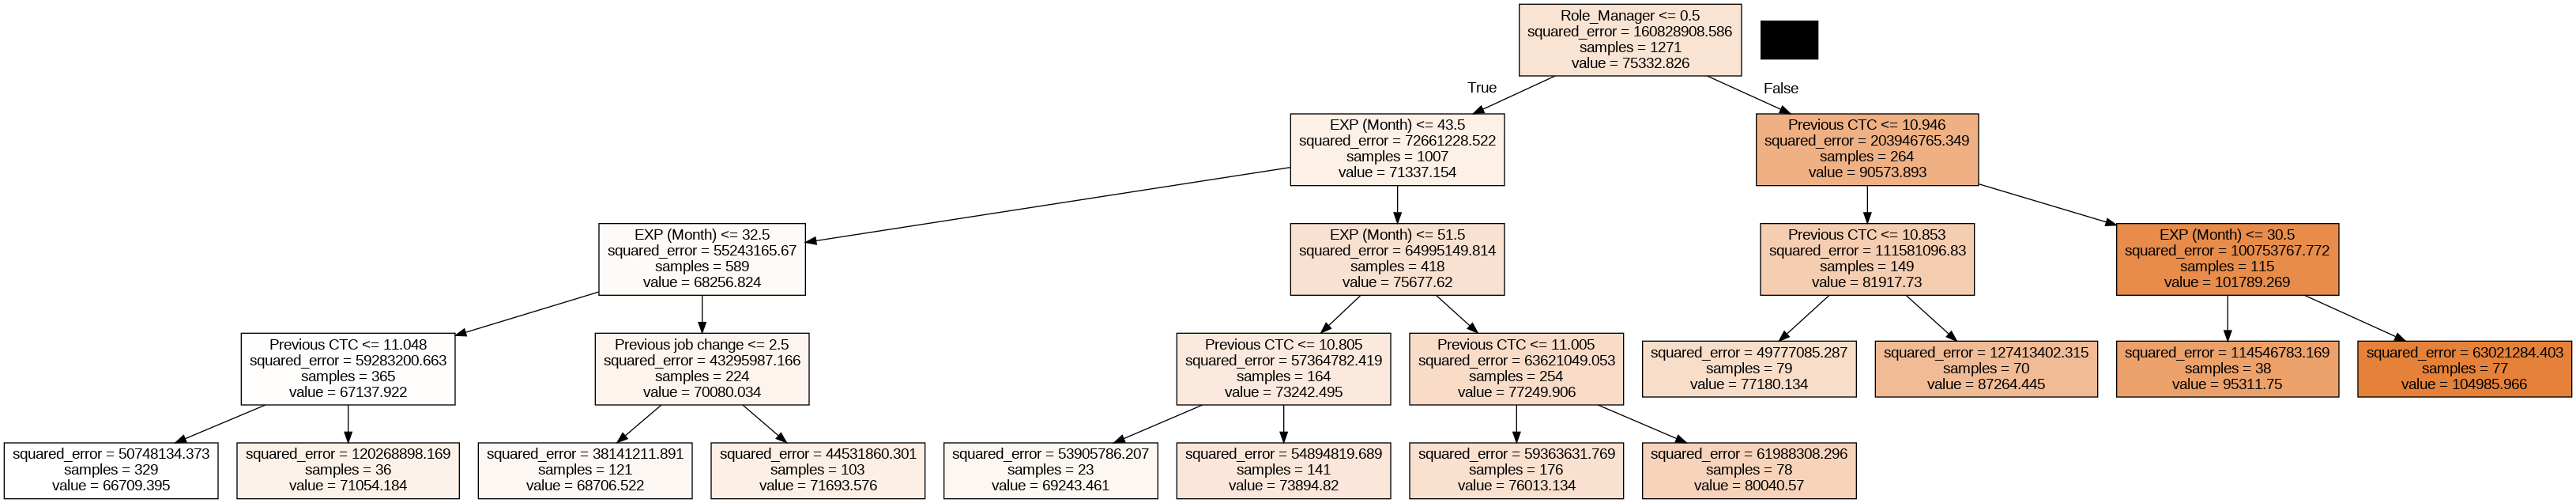

In [ ]:
regtree3 = tree.DecisionTreeRegressor( max_depth = 4, min_samples_split=100) # Creating a Decision Tree Regressor with specified hyperparameters
regtree3.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None, feature_names= X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

# **ENSEMBLE TECHNIQUE**

---




# **Bagging**

---



In [ ]:
from sklearn import tree # Import the DecisionTreeRegressor class from sklearn.tree
regtree = tree.DecisionTreeRegressor() # Create a DecisionTreeRegressor object with default hyperparameters

In [ ]:
from sklearn.ensemble import BaggingRegressor # Import the BaggingRegressor class from sklearn.ensemble

In [ ]:
# Replacing 'base_estimator' with 'estimator'
bag_reg = BaggingRegressor(estimator=regtree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [ ]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [ ]:
y_train_pred = bag_reg.predict(X_train)
y_test_pred = bag_reg.predict(X_test)

In [ ]:
print("Training R-squared:", r2_score(y_train, y_train_pred))
print("Test R-squared:", r2_score(y_test, y_test_pred))

Training R-squared: 0.9507790630996587
Test R-squared: 0.660336539882182


# **RANDOM FOREST**

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class from sklearn.ensemble

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42) # Creating a RandomForestRegressor with specified hyperparameters

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:

y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)
print("Training R-squared:", r2_score(y_train, y_train_pred))
print("Test R-squared:", r2_score(y_test, y_test_pred))


Training R-squared: 0.9507560348324667
Test R-squared: 0.6599356951557382


# **Grid Search**

---



In [ ]:
from sklearn.model_selection import GridSearchCV # Import the GridSearchCV class from sklearn.model_selection

In [ ]:
rf_reg = RandomForestRegressor(n_estimators= 250, random_state=42) # Creating a RandomForestRegressor with specified hyperparameters

In [ ]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [ ]:
grid_search = GridSearchCV(estimator=regtree, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1) # Create a GridSearchCV object with specified parameters

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2')

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.5936631102678064


In [ ]:
best_model = grid_search.best_estimator_ # Get the best model from the grid search
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred) # Calculate R-squared score on the test data
print("Test R-squared:", r2)

Test R-squared: 0.603220439065417


# **BOOSTING**

---



#1. **GRADIENT BOOSTING**

---



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # Import the GradientBoostingRegressor class from sklearn.ensemble

In [ ]:
gbc_reg = GradientBoostingRegressor()
gbc_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_train_pred = gbc_reg.predict(X_train)
y_test_pred = gbc_reg.predict(X_test)


In [ ]:
print("Training R-squared:", r2_score(y_train, y_train_pred)) # Using predictions from gbc_reg
print("Test R-squared:", r2_score(y_test, y_test_pred))


Training R-squared: 0.7256598349946741
Test R-squared: 0.6122071563801019


In [ ]:
gbc_reg2 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=2000, max_depth=4) # Creating a GradientBoostingRegressor with specified hyperparameters
gbc_reg2.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=2000)

In [ ]:
y_train_pred2 = gbc_reg2.predict(X_train)
y_test_pred2 = gbc_reg2.predict(X_test)

In [ ]:
print("Training R-squared:", r2_score(y_train, y_train_pred2)) # Using predictions from gbc_reg2
print("Test R-squared:", r2_score(y_test, y_test_pred2))

Training R-squared: 0.8748650270129646
Test R-squared: 0.6364074689654181


#2. **ADA BOOST**

---



In [ ]:
from sklearn.ensemble import AdaBoostRegressor # Import the AdaBoostRegressor class from sklearn.ensemble

In [ ]:
ada_reg = AdaBoostRegressor(learning_rate=0.01, n_estimators=5000, ) # Create an instance of AdaBoostRegressor with specified hyperparameters
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=5000)

In [ ]:

y_train_pred = ada_reg.predict(X_train)
y_test_pred = ada_reg.predict(X_test)

print("Training R-squared:", r2_score(y_train, y_train_pred))
print("Test R-squared:", r2_score(y_test, y_test_pred))


Training R-squared: 0.6255159599058389
Test R-squared: 0.599107212804373


In [ ]:
ada_reg2 = AdaBoostRegressor(rf_reg,learning_rate=0.05, n_estimators=500) #Creating AdaBoostRegressor second model with different hyperparameters
ada_reg2.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=250,
                                                  random_state=42),
                  learning_rate=0.05, n_estimators=500)

In [ ]:
y_train_pred2 = ada_reg2.predict(X_train)
y_test_pred2 = ada_reg2.predict(X_test)

print("Training R-squared:", r2_score(y_train, y_train_pred2))
print("Test R-squared:", r2_score(y_test, y_test_pred2))


Training R-squared: 0.9744065728390956
Test R-squared: 0.6659307317140781


#3. **XG BOOST**

---



In [ ]:
import xgboost as xgb # Import the XGBoost library, which provides an optimized gradient boosting framework

In [ ]:
xgb_clf = xgb.XGBRegressor(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1) # Create an XGBoost regressor with specified hyperparameters

In [ ]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.1, n_estimators=5000, n_jobs=-1)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 7699.3230389596365


In [ ]:
print(f"R-squared Score: {r2}") # Print the R-squared score

R-squared Score: 0.603220439065417


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

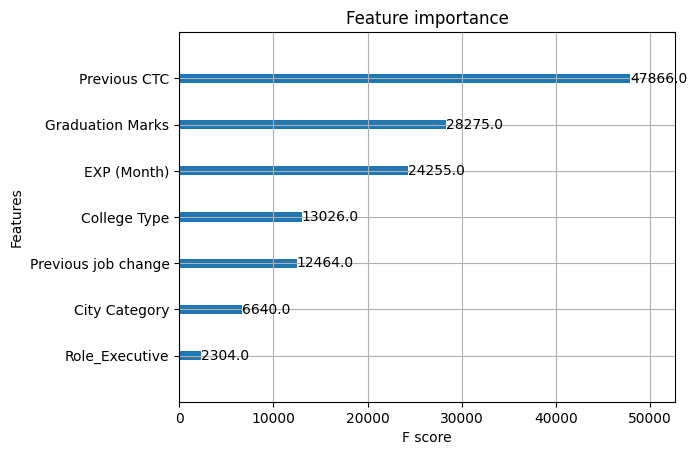

In [ ]:
xgb.plot_importance(xgb_model) # Plot the feature importance of xgb_model

In [ ]:
xgb_reg = xgb.XGBRegressor( n_estimators=1000, learning_rate=0.1, random_state= 42)

In [ ]:
param_test1 = {
    'max_depth': range(3,10,2), # Range of maximum tree depths to test (3, 5, 7, 9)
    'gamma': [0.1,0.2,0.3],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8,0.9], # Fraction of samples to be randomly sampled for training each tree
    'colsample_bytree': [0.8,0.9], # Fraction of columns to be randomly sampled for each tree
    'reg_alpha': [1e-2, 0.1, 1] # L1 regularization term on weights (alpha)
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_test1, n_jobs=-1, cv=5, scoring="r2")


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

In [ ]:
cvxg_reg = grid_search.best_estimator_ # Get the best model from the grid search

In [ ]:
y_train_pred = cvxg_reg.predict(X_train)
y_test_pred = cvxg_reg.predict(X_test)

print("Training R-squared:", r2_score(y_train, y_train_pred))
print("Test R-squared:", r2_score(y_test, y_test_pred))


Training R-squared: 0.7911391964567605
Test R-squared: 0.5981213754106076


# **ANALYSIS OF MODEL PERFORMANCE**

---



#1. **Views about the problem statement**

---



The goal is to create a machine learning model that predicts the salaries of new employees at TechWork Consulting, a company that helps businesses find skilled IT professionals quickly and effectively.

Understanding the Context:

	•	Company Overview: TechWork Consulting connects talented IT candidates with job opportunities. They have a strong approach to recruiting, which helps them stand out in the staffing industry.
	•	Importance of Salary Prediction: It’s important for the company to accurately determine what salaries to offer because:
	•	Attracting Talent: Offering the right salary can help them hire qualified candidates.
	•	Employee Retention: Setting appropriate salary expectations can lead to happier employees and lower turnover.
	•	Budgeting: Knowing salary expectations helps with planning and budgeting for new hires.
	•	Available Data: The dataset includes information such as previous salary, work experience, job role, and city category. By analyzing this data, the model can help set fair salaries for new employees.

Reason for Choosing Regression Models: Since the task involves predicting continuous values (salaries), regression models are more suitable than classification models, which are designed for predicting categorical outcomes. It’s essential to use regression to capture the nuances in salary determination, as salaries can vary significantly based on various factors.

In summary, the problem is to build a useful salary prediction model that allows TechWork Consulting to improve its hiring process and stay competitive in the IT staffing market.

#2. **Approach to Solving This Task**

---



*	**Data Collection and Preprocessing**: First, we will gather the dataset and clean it by fixing any missing values and transforming categorical data into numerical formats.
*	**Exploratory Data Analysis (EDA)**: Next, we will analyze the data to find patterns and see how different factors relate to salary. This could involve creating visualizations.
*	**Model Selection**: We will choose various regression models (like linear regression, multiple regression, ridge regression, lasso regression, decision trees, and ensemble methods) to test their performance.
*	**Training and Testing**: We will split the dataset into training and testing parts, train the models on the training data, and then evaluate their performance using R-square values on the test data.
*	**Hyperparameter Tuning**: We will adjust model settings (like the number of trees and maximum depth) to improve performance.
*	**Model Evaluation**: Finally, we will look at the R-square values for each model to find out which one predicts salaries the best.


#3. **Available ML Model Options**

---



*	**Linear Regression**: A basic model that predicts salaries based on simple
  relationships.
*	**Multiple Regression**: This model can handle several factors at once.
*	**Ridge Regression**: A model that helps avoid overfitting by adding penalties for large coefficients.
*	**Lasso Regression**: Similar to ridge regression, but it can eliminate some factors entirely by making their coefficients zero.
* **Decision Tree Regression**: This model captures complex interactions between features.
* **Ensemble Methods**
* **Bagging**: Combines multiple models (like Random Forest) to improve  accuracy  
  and stability.
* **Boosting**: Sequentially improves models by focusing on previous mistakes (like
  Gradient Boosting and AdaBoost).

# 4. **Best Model’s Performance and Possible Reasons**

---



The best-performing model based on the R-square values is the **bagging ensemble technique**, which achieved an **R-square value of 0.6603365** for the test data. It can be attributed to its ability to prevent overfitting through bootstrap sampling and averaging multiple predictions, capture complex patterns due to the ensemble nature of the model, and reduce prediction variance. Possible reasons for its strong performance include:

	•	Overfitting Prevention: Bagging reduces overfitting by averaging the results from multiple models, leading to more consistent outcomes.
	•	Complex Pattern Capture: This method can model non-linear relationships that simpler models might miss.
	•	Variance Reduction: Bagging helps decrease prediction variance, making it perform better on new data.
Key Parameters Contributing to Performance
1. **Number of Estimators** (n_estimators=1000):
A large number of estimators ensures that a wide range of possible models are considered, leading to better generalization.
2. **Bootstrap Sampling** (bootstrap=True):
This parameter introduces diversity among the models by training each estimator on a different subset of data.
3. **Parallel Processing** (n_jobs=-1):
Utilizing all available CPU cores speeds up computation significantly, allowing for faster training times without compromising performance.
4. **Random State** (random_state=42):
Setting a fixed random state ensures reproducibility of results, which is crucial for comparing different models or tuning hyperparameters.

# 5. **Steps to Improve the Selected Model’s Performance**

---



To make the bagging model even better, we can take the following steps:

	•	Hyperparameter Tuning: We can adjust settings like:
	•	Number of Estimators: Increasing the number of trees may improve results.
	•	Maximum Depth: Limiting how deep each tree can grow may help prevent overfitting.
	•	Minimum Sample Split: Setting a minimum number of samples to split nodes can balance model complexity.
	•	Minimum Sample Leaf: Defining how many samples a leaf node must have can make the predictions more reliable.
	•	Feature Engineering: We can create new features or change existing ones to capture important patterns better.
	•	Cross-Validation: We can use cross-validation to check how well the model performs on different subsets of the data, ensuring it generalizes well.
	•	Incorporate Domain Knowledge: Working with experts in the field can help identify important features or adjustments that can enhance accuracy.